Test CLASS .pre file passing

In [1]:
import numpy as np
from classy import Class

import asdf

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
#Parameters that are set once in AbacusSummit and will remain constant

fid_file = '../dat/cosmology_ini/fid_rat_Pk_dPk_templates_0.asdf'

with asdf.open(fid_file, lazy_load=False, copy_arrays=True) as f:
            header = f['header']

fid_params = {}
for key in header.keys():
    if key in ['ztmp0', 'ztmp1', 'ztmp2', 'ztmp3', 'ztmp4', 'ztmp5', 'ztmp6', 'theta_s_100', 'sigma8_cb', #nuisance
              'omega_b', 'omega_cdm', 'h', 'A_s', 'n_s', 'alpha_s', 'N_ur', 'N_ncdm', 'omega_ncdm', 
              'w0_fld', 'wa_fld']:
        pass
    else:
        fid_params[key] = header[key]
        
additional_params = {'output' : 'mPk, tCl, pCl, lCl',
                    'lensing' : 'yes',
                    'P_k_max_h/Mpc' : 50.0,
                    'modes' : 's',
                    'z_pk' : '0.0, 1.0, 3.0, 7.0, 49.0'}

In [7]:
pop_list = ['Omega_Lambda', 'Omega_b', 'Omega_k']
[fid_params.pop(key) for key in pop_list if key in fid_params]

[0.0, 0.0]

In [3]:
fid_params

{'Omega_Lambda': 0.0,
 'Omega_dcdmdr': 0.0,
 'Omega_idm_dr': 0.0,
 'Omega_k': 0.0,
 'Omega_scf': 0.0,
 'P_k_ini type': 'analytic_Pk',
 'T_cmb': 2.7255,
 'YHe': 'BBN',
 'annihilation': 0.0,
 'background_verbose': 0.0,
 'c_gamma_over_c_fld': 0.4,
 'cs2_fld': 1.0,
 'decay': 0.0,
 'format': 'camb',
 'gauge': 'synchronous',
 'headers': 'yes',
 'helium_fullreio_redshift': 3.5,
 'helium_fullreio_width': 0.5,
 'input_verbose': 0.0,
 'k_pivot': 0.05,
 'lensing_verbose': 0.0,
 'nonlinear_verbose': 0.0,
 'output_verbose': 0.0,
 'perturbations_verbose': 0.0,
 'primordial_verbose': 0.0,
 'recombination': 'HyRec',
 'reio_parametrization': 'reio_camb',
 'reionization_exponent': 1.5,
 'reionization_width': 0.5,
 'spectra_verbose': 0.0,
 'stat_f_idr': 0.875,
 'tau_reio': 0.0544,
 'thermodynamics_verbose': 0.0,
 'transfer_verbose': 0.0,
 'use_ppf': 'yes',
 'write background': 'yes',
 'write primordial': 'no',
 'write thermodynamics': 'no'}

In [4]:
#Parameters that are varied in AbacusSummit
cosmo_params = {'omega_b' : 0.02237,
               'omega_cdm' : 0.12,
               'h' : 0.6736,
               'A_s' : 2.083e-09,
               'n_s' : 0.9649,
               'alpha_s' : 0.0,
               'N_ur' : 2.0328,
               'N_ncdm' : 1.0,
               'omega_ncdm' : 0.0006442,
               'w0_fld' : -1.0,
               'wa_fld' : 0.0}

In [5]:
#merge parametrs into one dict
full_params = cosmo_params.copy()
full_params.update(fid_params)
full_params.update(additional_params)

In [6]:
# Create an instance of the CLASS wrapper
cosmo_full = Class()

# Set the parameters to the cosmological code
cosmo_full.set(full_params)

# Run the whole code. Depending on your output, it will call the
# CLASS modules more or less fast. For instance, without any
# output asked, CLASS will only compute background quantities,
# thus running almost instantaneously.
# This is equivalent to the beginning of the `main` routine of CLASS,
# with all the struct_init() methods called.
cosmo_full.compute()

# Access the lensed cl until l=2000
cls_full = cosmo_full.lensed_cl(1040)

# Print on screen to see the output
#print(cls)
# It is a dictionnary that contains the fields: tt, te, ee, bb, pp, tp

# plot something with matplotlib...

# Clean CLASS (the equivalent of the struct_free() in the `main`
# of CLASS. This step is primordial when running in a loop over different
# cosmologies, as you will saturate your memory very fast if you ommit
# it.
#cosmo.struct_cleanup()

ell = cls_full['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi

In [21]:
cosmo_full.pk(1, 1)

32.06487358150846

In [15]:
cls_full

{'tt': array([0.00000000e+00, 0.00000000e+00, 1.43005670e-10, ...,
        8.32882543e-16, 8.32717651e-16, 8.32603333e-16]),
 'ee': array([0.00000000e+00, 0.00000000e+00, 4.35267072e-15, ...,
        2.82775616e-17, 2.80410019e-17, 2.78029316e-17]),
 'te': array([ 0.00000000e+00,  0.00000000e+00,  3.68517193e-13, ...,
        -5.13105462e-17, -5.18063705e-17, -5.22838786e-17]),
 'bb': array([0.00000000e+00, 0.00000000e+00, 2.32271895e-19, ...,
        6.89686216e-20, 6.88478548e-20, 6.87280614e-20]),
 'pp': array([0.00000000e+00, 0.00000000e+00, 8.43888680e-09, ...,
        2.77916667e-20, 2.76342521e-20, 2.74778657e-20]),
 'tp': array([0.00000000e+00, 0.00000000e+00, 4.64426529e-10, ...,
        1.84095067e-21, 1.77586392e-21, 1.71177924e-21]),
 'ell': array([   0,    1,    2, ..., 1038, 1039, 1040])}

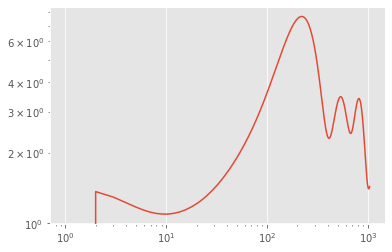

In [7]:
plt.loglog(ell, factor * cls_full['tt'])

In [3]:
#############################################
#
# Cosmological parameters and other CLASS parameters
#
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm':0.1201075,
                   'A_s':2.100549e-09,
                   'n_s':0.9660499,
                   'tau_reio':0.05430842 ,
                   # output and precision parameters
                   'output':'tCl,pCl,lCl',
                   'lensing':'yes',
                   'l_max_scalars':5000}
#
M = Class()
#
###############
#    
# call CLASS for the total Cl's and then for each contribution
#
###############
#
M.set(common_settings)
M.compute()
cl_tot = M.raw_cl(3000)
cl_lensed = M.lensed_cl(3000)
M.empty()           # reset input

In [4]:


# modules and settings for the plot
#
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]



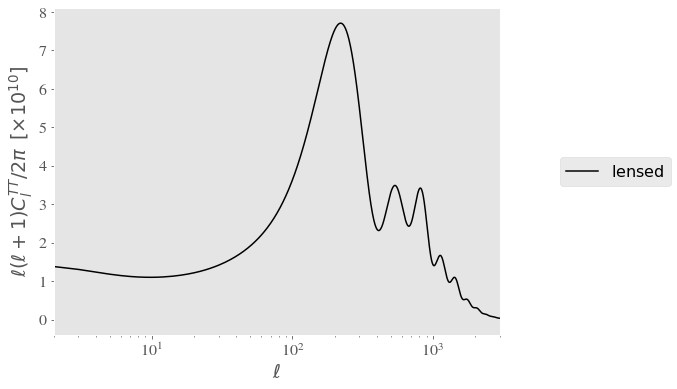

In [12]:


#################
#
# start plotting
#
#################
#
plt.xlim([2,3000])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{TT} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.grid()
#
ell = cl_tot['ell']
factor = 1.e10*ell*(ell+1.)/2./np.pi
#plt.semilogx(ell,factor*cl_tsw['tt'],'c-',label=r'$\mathrm{T+SW}$')
#plt.semilogx(ell,factor*cl_eisw['tt'],'r-',label=r'$\mathrm{early-ISW}$')
#plt.semilogx(ell,factor*cl_lisw['tt'],'y-',label=r'$\mathrm{late-ISW}$')
#plt.semilogx(ell,factor*cl_dop['tt'],'g-',label=r'$\mathrm{Doppler}$')
#plt.semilogx(ell,factor*cl_tot['tt'],'r-',label=r'$\mathrm{total}$')
plt.semilogx(ell,factor*cl_lensed['tt'],'k-',label=r'$\mathrm{lensed}$')
#
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))



In [8]:
import pyccl as ccl
h = 0.6736
Omega_c = 0.12/h**2
Omega_b = 0.02237/h**2
A_s = 2.083e-09
n_s = 0.9649
cosmo = ccl.Cosmology(Omega_c = Omega_c, Omega_b = Omega_b, h = h, A_s = A_s, n_s = n_s)

In [9]:
#calculate theoretical Cls
lmax = 1500
ell = np.arange(0, lmax, 1) #lmax = 1500
cmbl = ccl.CMBLensingTracer(cosmo, z_source=1090.)
cls_cmb = ccl.angular_cl(cosmo, cmbl, cmbl, ell)

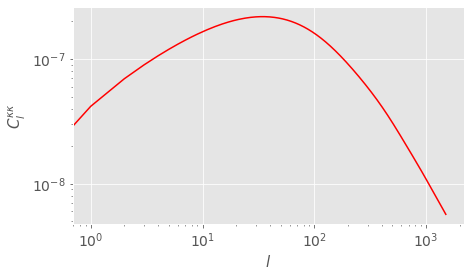

In [13]:
fs = 15
plt.figure(figsize = (7,4))
plt.xlabel('$l$',fontsize=fs)
plt.ylabel('$C^{\kappa \kappa}_{l}$',fontsize=fs)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.plot(ell, cls_cmb, 'r-')

In [22]:
# Python3 code to demonstrate working of
# Remove multiple keys from dictionary
# Using pop() + list comprehension
  
# initializing dictionary
test_dict = {'Gfg' : 1, 'is' : 2, 'best' : 3, 'for' : 4, 'CS' : 5}
  
# initializing Remove keys
rem_list = ['is', 'for', 'CS']
  
# printing original dictionary
print("The original dictionary is : " + str(test_dict))
  
# Using pop() + list comprehension
# Remove multiple keys from dictionary
[test_dict.pop(key) for key in rem_list]
  
# printing result 
print("Dictionary after removal of keys : " + str(test_dict))

The original dictionary is : {'Gfg': 1, 'is': 2, 'best': 3, 'for': 4, 'CS': 5}
Dictionary after removal of keys : {'Gfg': 1, 'best': 3}


In [23]:
test_dict

{'Gfg': 1, 'best': 3}

In [25]:
if 'Gg' in test_dict:
    print('ok')
else:
    print('nok')

nok


Check astropy cosmo

In [8]:
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u

In [14]:
flatcosmo = FlatLambdaCDM(H0 = 67., Om0=0.3, Tcmb0=2.7, 
                          m_nu=(np.array([0, 0, 0.06]) * u.eV).to(u.eV, equivalencies=u.mass_energy()), 
                          Ob0=0.04)

In [21]:
flatcosmo.Ogamma0 + flatcosmo.Onu0

0.0014773651585881563

Fixing up Skylens

In [33]:
from astropy.cosmology import FLRW as cosmo
from astropy.cosmology import FlatLambdaCDM as cosmo_flat
from astropy.cosmology import Planck15 as planck15
from astropy import units as u

In [35]:
planck15.h

0.6774

In [ ]:
planck15.Neff

In [24]:
flatcosmo = FlatLambdaCDM(H0 = 67., Om0=0.3, Tcmb0=2.7, 
                          m_nu=(np.array([0, 0, 0.06]) * u.eV).to(u.eV, equivalencies=u.mass_energy()), 
                          Ob0=0.04)
flatcosmo.Ode0

0.6985226348414117

In [ ]:
cosmo_full = cosmo(H0=67)

In [ ]:
import numpy as np
#from galsim.integ import int1d
from scipy.integrate import quad as scipy_int1d
import warnings
from astropy.cosmology import FlatLambdaCDM as cosmo
cosmo_h=cosmo.clone(H0=100)
cosmo_planck15=cosmo

from astropy.constants import c,G
from astropy import units as u

c=c.to(u.km/u.second)
G2=G.to(u.Mpc/u.Msun*u.km**2/u.second**2)
H100=100*(u.km/u.second/u.Mpc)

c_unit=c.unit
G2_unit=G2.unit
H0_unit=H100.unit
c=c.value
G2=G2.value
H100=H100.value
